In [6]:
# plots

import sys
import pandas as pd
import numpy as np
import os

from scipy import stats
import scipy.constants
from obspy import UTCDateTime

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import warnings


# acceleration of gravity constant in meters/s**2
GACC_m = scipy.constants.g
GACC_cm = GACC_m * 100

pd.options.display.max_columns = None

In [7]:
warnings.filterwarnings("ignore")

In [8]:
# directory PATH
METADIR = './ingv_metadata'
FIGDIR='./ingv_output'

# file NAMES
# MetaData
events_metaname=os.path.join(METADIR, 'metadata_Instance_events_v2.csv')
noise_metaname=os.path.join(METADIR, 'metadata_Instance_noise.csv')
# Figures
# events_figname=os.path.join(FIGDIR,'waveforms_Evs.png')
# gm_figname=os.path.join(FIGDIR,'waveforms_Evs_gm.png')
# noise_figname=os.path.join(FIGDIR,'waveforms_Noise.png')

In [9]:
# read metadata for events
df_metadata = pd.read_csv(events_metaname, dtype={'station_location_code': object})
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159249 entries, 0 to 1159248
Columns: 115 entries, source_id to source_type
dtypes: float64(86), int64(3), object(26)
memory usage: 1017.1+ MB


In [10]:
df_metadata.describe()

,source_id,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,source_latitude_deg,source_longitude_deg,source_depth_km,source_origin_uncertainty_s,source_latitude_uncertainty_deg,source_longitude_uncertainty_deg,source_depth_uncertainty_km,source_stderror_s,source_gap_deg,source_horizontal_uncertainty_km,source_magnitude,source_mt_scalar_moment_Nm,path_travel_time_P_s,path_travel_time_S_s,path_residual_P_s,path_residual_S_s,path_ep_distance_km,path_hyp_distance_km,path_azimuth_deg,path_backazimuth_deg,path_weight_phase_location_P,path_weight_phase_location_S,trace_dt_s,trace_npts,trace_P_uncertainty_s,trace_S_uncertainty_s,trace_P_arrival_sample,trace_S_arrival_sample,trace_E_median_counts,trace_N_median_counts,trace_Z_median_counts,trace_E_mean_counts,trace_N_mean_counts,trace_Z_mean_counts,trace_E_min_counts,trace_N_min_counts,trace_Z_min_counts,trace_E_max_counts,trace_N_max_counts,trace_Z_max_counts,trace_E_rms_counts,trace_N_rms_counts,trace_Z_rms_counts,trace_E_lower_quartile_counts,trace_N_lower_quartile_counts,trace_Z_lower_quartile_counts,trace_E_upper_quartile_counts,trace_N_upper_quartile_counts,trace_Z_upper_quartile_counts,trace_E_spikes,trace_N_spikes,trace_Z_spikes,trace_E_snr_db,trace_N_snr_db,trace_Z_snr_db,trace_E_pga_cmps2,trace_E_pgv_cmps,trace_E_pga_perc,trace_E_sa03_cmps2,trace_E_sa10_cmps2,trace_E_sa30_cmps2,trace_N_pga_cmps2,trace_N_pgv_cmps,trace_N_pga_perc,trace_N_sa03_cmps2,trace_N_sa10_cmps2,trace_N_sa30_cmps2,trace_Z_pga_cmps2,trace_Z_pgv_cmps,trace_Z_pga_perc,trace_Z_sa03_cmps2,trace_Z_sa10_cmps2,trace_Z_sa30_cmps2,trace_pga_cmps2,trace_pgv_cmps,trace_pga_perc,trace_sa03_cmps2,trace_sa10_cmps2,trace_sa30_cmps2,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number
count,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.112450e+06,1.159249e+06,1.159249e+06,1.159183e+06,1.159249e+06,3.334300e+04,1.159249e+06,713883.000000,1.159249e+06,713883.000000,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,713883.000000,1.159249e+06,1159249.0,1.159249e+06,713883.000000,1.159249e+06,713883.000000,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.158861e+06,1.158891e+06,1.158948e+06,1.158890e+06,1.158893e+06,1.158989e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.159248e+06,1.159248e+06,1.159249e+06,1.159249e+06,1.159249e+06,1.158159e+06,1.158194e+06,1.158210e+06,1.158573e+06,1.158587e+06,1.158572e+06,1.159076e+06,1.158920e+06,1.158872e+06,1.158261e+06,1.158384e+06,1.158259e+06,1.159101e+06,1.158985e+06,1.158886e+06,1.158346e+06,1.158287e+06,1.158339e+06,1.159049e+06,1.159004e+06,1.158950e+06,1.158054e+06,1.158086e+06,1.158166e+06,1.148168e+06,1.158409e+06,1.097035e+06,824135.000000,824135.000000,807934.000000,807934.000000,807934.000000
mean,9.619274e+06,4.231160e+01,1.329519e+01,7.828979e+02,6.236122e+02,4.226874e+01,1.333180e+01,2.017250e+01,9.937336e-02,5.190020e-03,7.680130e-03,7.119110e-01,3.067790e-01,7.988319e+01,7.369210e-01,2.270979e+00,2.798931e+16,1.131418e+01,13.544003,-1.500866e-02,0.040794,6.043807e+01,6.793635e+01,1.933076e+02,1.845858e+02,7.592960e+01,65.487265,1.000000e-02,12000.0,2.452557e-01,0.368406,1.968660e+03,2585.199879,-5.193998e+01,-2.538564e+01,-1.669480e+02,-2.206724e-04,1.435744e-05,3.645737e-05,-2.184219e+04,-2.295850e+04,-1.449866e+04,2.196711e+04,2.306858e+04,1.474176e+04,4.115827e+03,3.805412e+03,2.793773e+03,-1.481738e+03,-1.136579e+03,-1.058305e+03,1.703203e+03,1.259727e+03,1.225016e+03,5.414954e-01,3.263233e-01,4.605973e-01,1.898033e+01,1.898001e+01,1.675306e+01,2.932866e-01,1.791308e-02,2.983693e-02,2.867172e-01,3.500663e-02,1.046928e-02,2.988202e-01,1.780816e-02,3.036598e-02,3.196112e-01,6.844860e-02,1.254090e-02,2.789319e-01,1.402507e-02,2.789384e-02,1.774433e-01,3.525106e-02,1.116473e-02,3.710177e-01,2.934

In [11]:
from ingv_plot_functions import split, detect_time, bin_width, my_ceil,\
    my_floor, round_up, plot_subplot, hist_subplot, plot_hexbin_panels, \
    plot_histogram, plot_histo_panels, plot_pie_panels

In [12]:
fignumbers = 'abcdefghijklmnopqrstuvwxyz'
alllabs = split(fignumbers)

In [13]:
# We filtered the data from the seismographs for near-source and far-source earthquakes by defining
# a near-source earthquakes as those earthquakes whose hypocenter is less that 17 km and far-source
# as those between 17 km and 50 km, also, we only considered those earthquakes with recorded Peak
# Ground Motion acceleration greater than 500 gal

DEPTH_MAX_CONDITION = 50 # in km
MIN_SOURCE_MAGNITUDE = 2
filtered_df_metadata = df_metadata.query(f"source_depth_km <= {DEPTH_MAX_CONDITION}")
filtered_df_metadata = filtered_df_metadata.query(f"source_magnitude >= {MIN_SOURCE_MAGNITUDE}")
filtered_df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855430 entries, 0 to 1159248
Columns: 115 entries, source_id to source_type
dtypes: float64(86), int64(3), object(26)
memory usage: 757.1+ MB


In [14]:
filtered_df_metadata.describe()

,source_id,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,source_latitude_deg,source_longitude_deg,source_depth_km,source_origin_uncertainty_s,source_latitude_uncertainty_deg,source_longitude_uncertainty_deg,source_depth_uncertainty_km,source_stderror_s,source_gap_deg,source_horizontal_uncertainty_km,source_magnitude,source_mt_scalar_moment_Nm,path_travel_time_P_s,path_travel_time_S_s,path_residual_P_s,path_residual_S_s,path_ep_distance_km,path_hyp_distance_km,path_azimuth_deg,path_backazimuth_deg,path_weight_phase_location_P,path_weight_phase_location_S,trace_dt_s,trace_npts,trace_P_uncertainty_s,trace_S_uncertainty_s,trace_P_arrival_sample,trace_S_arrival_sample,trace_E_median_counts,trace_N_median_counts,trace_Z_median_counts,trace_E_mean_counts,trace_N_mean_counts,trace_Z_mean_counts,trace_E_min_counts,trace_N_min_counts,trace_Z_min_counts,trace_E_max_counts,trace_N_max_counts,trace_Z_max_counts,trace_E_rms_counts,trace_N_rms_counts,trace_Z_rms_counts,trace_E_lower_quartile_counts,trace_N_lower_quartile_counts,trace_Z_lower_quartile_counts,trace_E_upper_quartile_counts,trace_N_upper_quartile_counts,trace_Z_upper_quartile_counts,trace_E_spikes,trace_N_spikes,trace_Z_spikes,trace_E_snr_db,trace_N_snr_db,trace_Z_snr_db,trace_E_pga_cmps2,trace_E_pgv_cmps,trace_E_pga_perc,trace_E_sa03_cmps2,trace_E_sa10_cmps2,trace_E_sa30_cmps2,trace_N_pga_cmps2,trace_N_pgv_cmps,trace_N_pga_perc,trace_N_sa03_cmps2,trace_N_sa10_cmps2,trace_N_sa30_cmps2,trace_Z_pga_cmps2,trace_Z_pgv_cmps,trace_Z_pga_perc,trace_Z_sa03_cmps2,trace_Z_sa10_cmps2,trace_Z_sa30_cmps2,trace_pga_cmps2,trace_pgv_cmps,trace_pga_perc,trace_sa03_cmps2,trace_sa10_cmps2,trace_sa30_cmps2,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number
count,8.554300e+05,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,817947.000000,855430.000000,855430.000000,855371.000000,855430.000000,3.222100e+04,855430.000000,484178.000000,855430.000000,484178.000000,855430.000000,855430.000000,855430.000000,855430.000000,855430.000000,484178.000000,8.554300e+05,855430.0,855430.000000,484178.000000,855430.000000,484178.000000,8.554300e+05,8.554300e+05,8.554300e+05,855430.000000,855430.000000,855430.000000,8.550970e+05,8.551240e+05,8.551740e+05,8.551200e+05,8.551200e+05,8.552100e+05,8.554300e+05,8.554300e+05,8.554300e+05,8.554300e+05,8.554300e+05,8.554300e+05,8.554300e+05,8.554290e+05,8.554290e+05,855430.000000,855430.000000,855430.000000,855062.000000,855093.000000,855110.000000,8.549000e+05,8.548980e+05,8.548990e+05,8.552720e+05,8.551520e+05,8.551200e+05,8.546670e+05,8.547510e+05,8.546670e+05,8.552940e+05,8.552110e+05,8.551380e+05,8.547100e+05,8.546570e+05,8.547040e+05,8.552560e+05,8.552310e+05,8.551940e+05,854513.000000,854488.000000,8.546000e+05,8.543750e+05,8.547450e+05,829153.000000,609125.000000,609125.000000,596852.000000,596852.000000,596852.000000
mean,9.451536e+06,42.413777,13.200121,774.873433,622.007858,42.367643,13.271882,11.835530,0.088559,0.004561,0.006722,0.613424,0.325549,71.404096,0.643405,2.508758,2.763233e+16,11.613895,13.546202,-0.020892,0.059961,65.834338,67.790416,199.192765,182.815246,74.721858,63.874393,1.000000e-02,12000.0,0.244657,0.376647,1955.443395,2582.073078,-6.641259e+01,-2.485214e+01,-2.033107e+02,-0.000150,-0.000008,-0.000002,-2.817358e+04,-2.935545e+04,-1.858290e+04,2.830904e+04,2.961004e+04,1.869511e+04,4.991887e+03,4.626556e+03,3.358574e+03,-1.732410e+03,-1.319494e+03,-1.204476e+03,1.996511e+03,1.466153e+03,1.396790e+03,0.478357,0.305485,0.409012,21.668875,21.663128,19.303510,3.709498e-01,2.079058e-02,3.773153e-02,3.054776e-01,3.960112e-02,1.164931e-02,3.778687e-01,2.086131e-02,3.853188e-02,3.393084e-01,7.716908e-02,1.377355e-02,3.320707e-01,1.511386e-02,3.322434e-02,1.896909e-01,4.051448e-02,1.248527e-02,0.458304,0.032730,4.654004e-02,3.688640e-01,8.749402e-02,0.017771,1.035571,1.623194,1.070

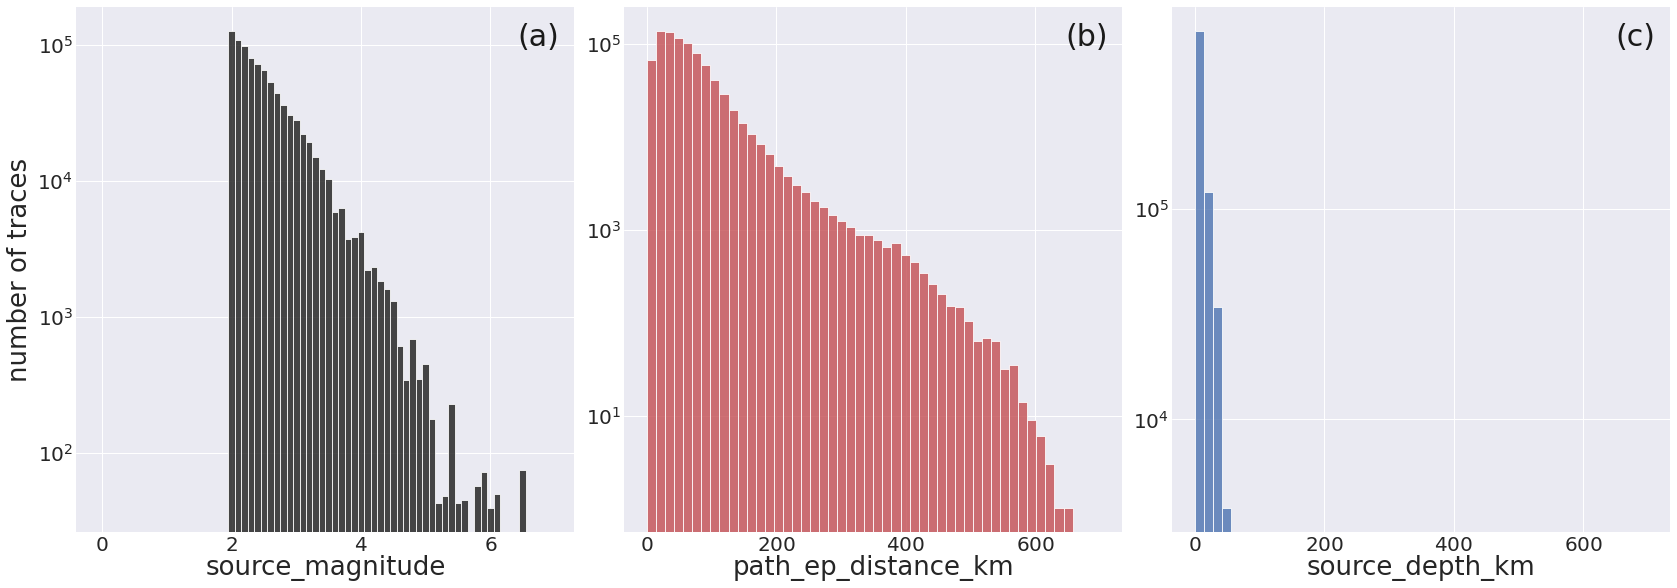

In [15]:
cols = ['source_magnitude','path_ep_distance_km', 'source_depth_km']

ncols = 3
nrows = 1

bin_edges = bin_width(0,7,0.1)

bins = [bin_edges,50,50,50]

ylabel_text = ['number of traces','','']


lfs=26   # label font size
tlfs=20  # tick label font size

label_font_size=lfs*np.ones(ncols*nrows)
tick_label_font_size =tlfs*np.ones(ncols*nrows)

n_x_ticks=[5,6,6,6]  # number of ticks in the x axis
n_y_ticks=[5,6,6,4]

#
labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30
#
colors = ['k','r','b','g']
logs = [True,True,True,False]

# ranges = [[0,7,1,2000000],[0,700,1,2000000],[0,700,1,2000000],[0,360,1,2000000] ]
ranges = [[0,7],[0,700],[0,700],[0,360] ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,filtered_df_metadata,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, fontsize=fontsize, c=color)

figname = os.path.join(FIGDIR, "distributions_of_magnitude_epicentraldistance_sourcedepth.png")
plt.savefig(figname)
plt.show()

gridsize (100, 35)


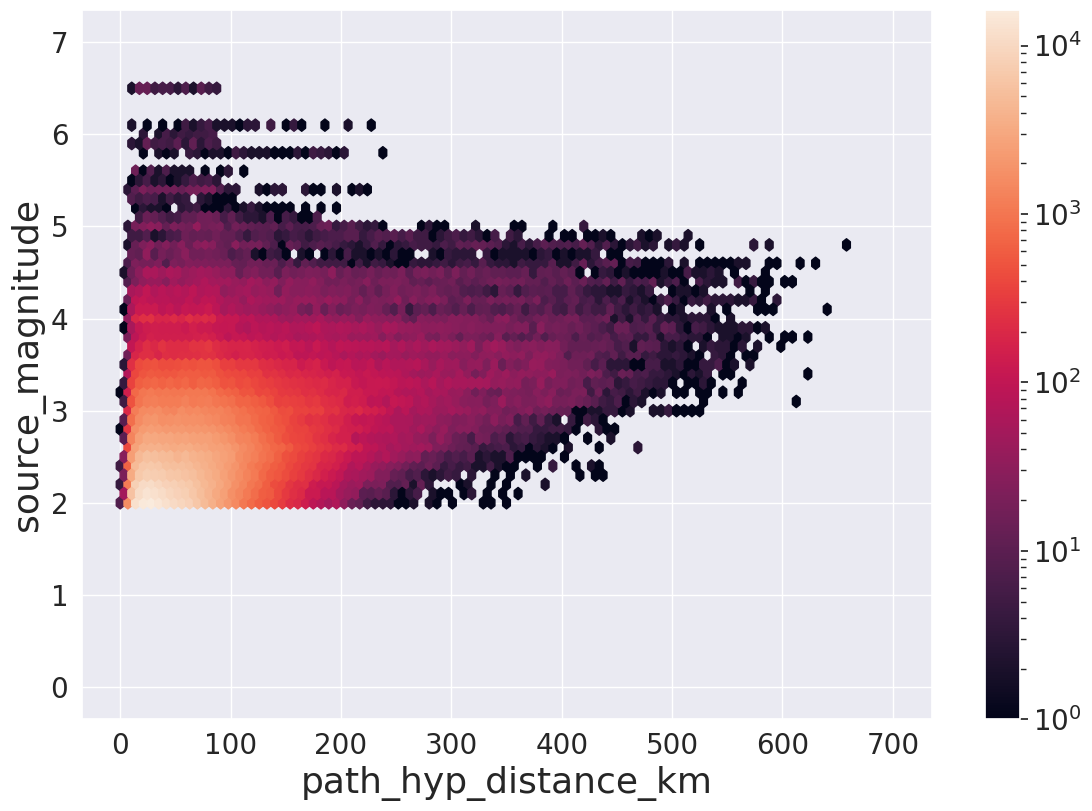

In [16]:

# Diagrams of the magnitude distribution versus hypocenter distance as hexbin plot

cols = [['path_hyp_distance_km','source_magnitude']]  

label_font_size = [26]
#
tick_label_font_size = [20]

ncols = 1
nrows = 1

#
logs = [[False,False], [False,False]
       ]

ranges = [[0,700,0,7.]
         ]
bins=['log']

labs = alllabs[:(ncols*nrows)]
gridsize = 50

style_label = 'seaborn-deep'

fig = plot_hexbin_panels(style_label, filtered_df_metadata, cols, ncols, nrows,
                          label_font_size, tick_label_font_size, labs, colors, logs, ranges, bins, gridsize = (100,35))#, set_letter=False)

figname = os.path.join(FIGDIR, "magnitude_distribution_vs_hypocenter_distance.png")
plt.savefig(figname)

plt.show()
# conclusion: the most effect of the earthquake are felt in the stations that are closer to the earthquake

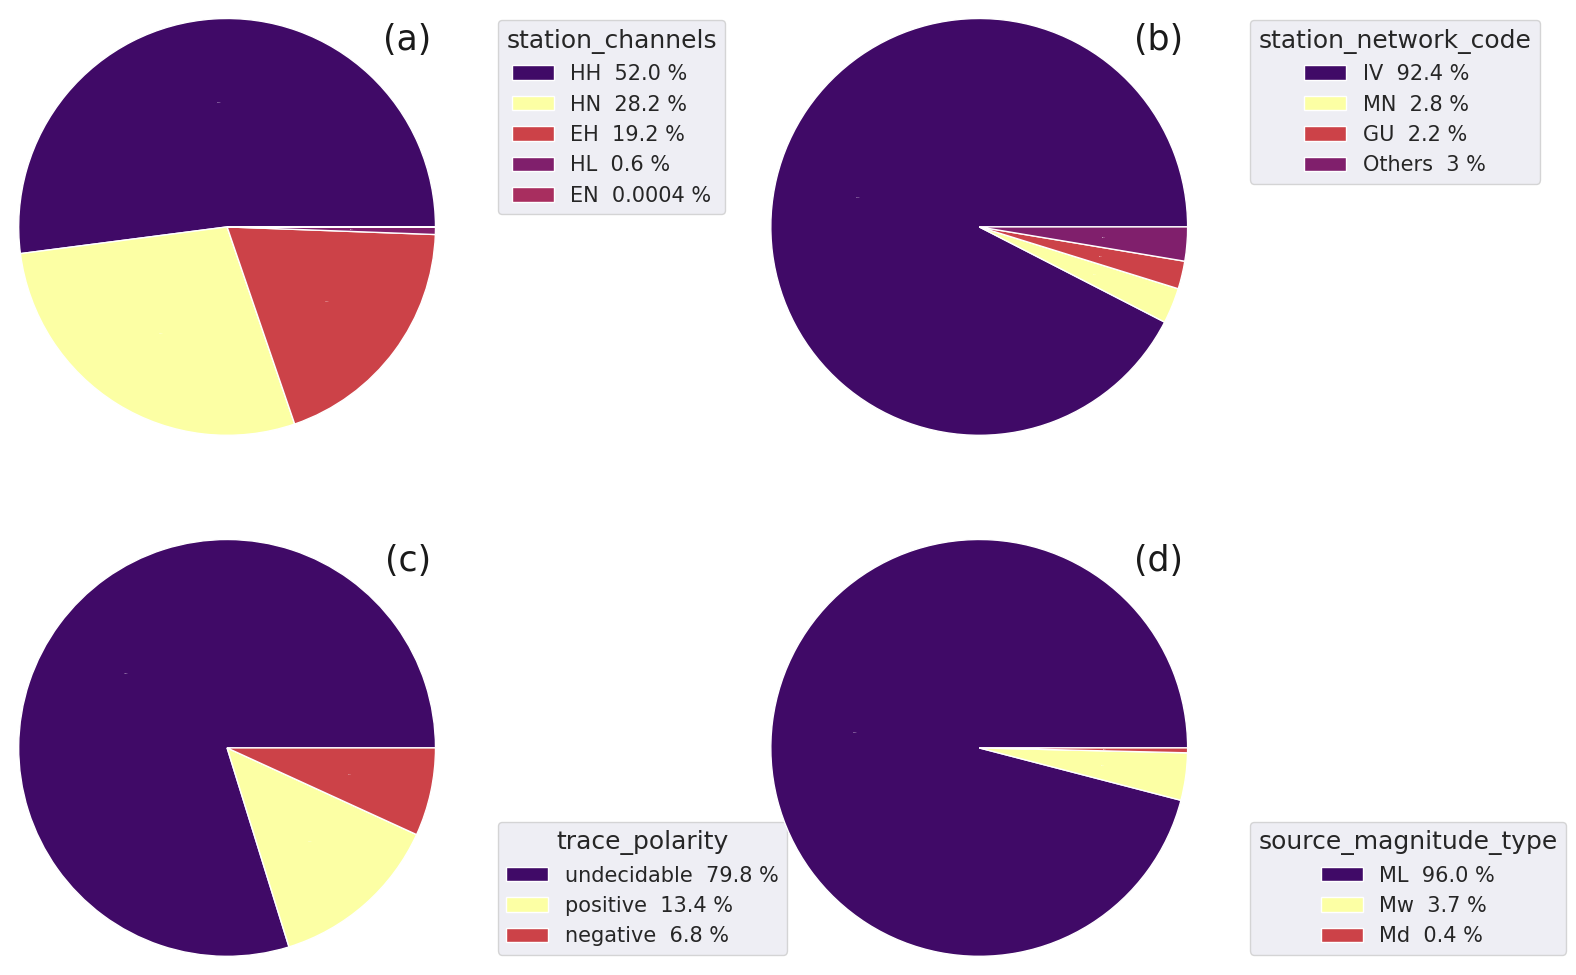

In [17]:
# Pie diagrams summarizing the distribution of:
# the channels (a)
# the data contributing networks (b)
# the P-wave polarities (c)
# the magnitude types of the dataset (d)

df_grouped = []
cols = ['station_channels', 'station_network_code','trace_polarity', 'source_magnitude_type']

for col in cols:
    df_grouped.append(filtered_df_metadata.groupby(col).count())
nrows,ncols = (2,2)
lfs=18   # label font size
tlfs=15  # tick label font size
fontsize=25   

label_font_size=lfs*np.ones(ncols*nrows)
tick_font_size=tlfs*np.ones(ncols*nrows)

labs = alllabs[:(ncols*nrows)]
color='k'       

PercMIN=[0.0001, 1, 0.1,0.1 ]   
fig = plot_pie_panels(df_grouped, cols, ncols, nrows, label_font_size, tick_font_size, left=-0.1, wspace=-0.25, fontsize=fontsize, PercMIN=PercMIN, c=color, labs=labs)

figname = os.path.join(FIGDIR, "distribution_of_statition_channels_networks_tracepolarity_source_magnitude_type.png")
plt.savefig(figname)
plt.show()

# Imaging

In [18]:
# Imaging

import string
import time
import argparse as ap
import sys
import os
import obspy
import numpy as np
import obspy.core as oc
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42
from datetime import datetime, timedelta
from obspy.imaging.beachball import beachball, beach, mt2plane, tdl, mt2axes, MomentTensor
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs

import pylab as plt
import pandas as pd
import h5py
import warnings

from obspy import read_inventory

In [19]:
# generate first the stations
df_eq0 = df_metadata[['source_id', 'source_origin_time', 'source_latitude_deg',
       'source_longitude_deg','source_depth_km', 'source_magnitude']].groupby('source_id').mean()
# count using sta_lat as dummy index
df_eq1 = df_metadata[['source_id', 'source_magnitude']].groupby('source_id').count()
# rename
df_eq1.rename(columns={'source_magnitude': "counts"},inplace=True)

# generate the dataframe
df_eq = pd.concat([df_eq0,df_eq1], axis=1)

# Define symbol dimension as a funcion of source magnitude
mag_size = []
f = 2.0
for m in df_eq.source_magnitude.values:
    if m <= 1.0: fact  = f*1.
    if m > 1.0 and m <= 2.0: fact  = f*4
    if m > 2.0 and m <= 3.0: fact  = f*8
    if m > 3.0 and m <= 4.0: fact  = f*16
    if m > 4.0 and m <= 5.0: fact  = f*32
    if m > 5.0 and m <= 6.0: fact  = f*64
    if m > 6.0 and m <= 7.0: fact  = f*128
    if m > 7.0: fact  = f*150
    mag_size.append(fact)

In [20]:
# Define colormap as a function of hypocenter depth 

cmap = plt.cm.inferno_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = [0,5,10,15,20,25,30,35,40,50,75, 100, 200,300,400,500,600,620]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mapper=ScalarMappable(norm=norm, cmap=cmap)

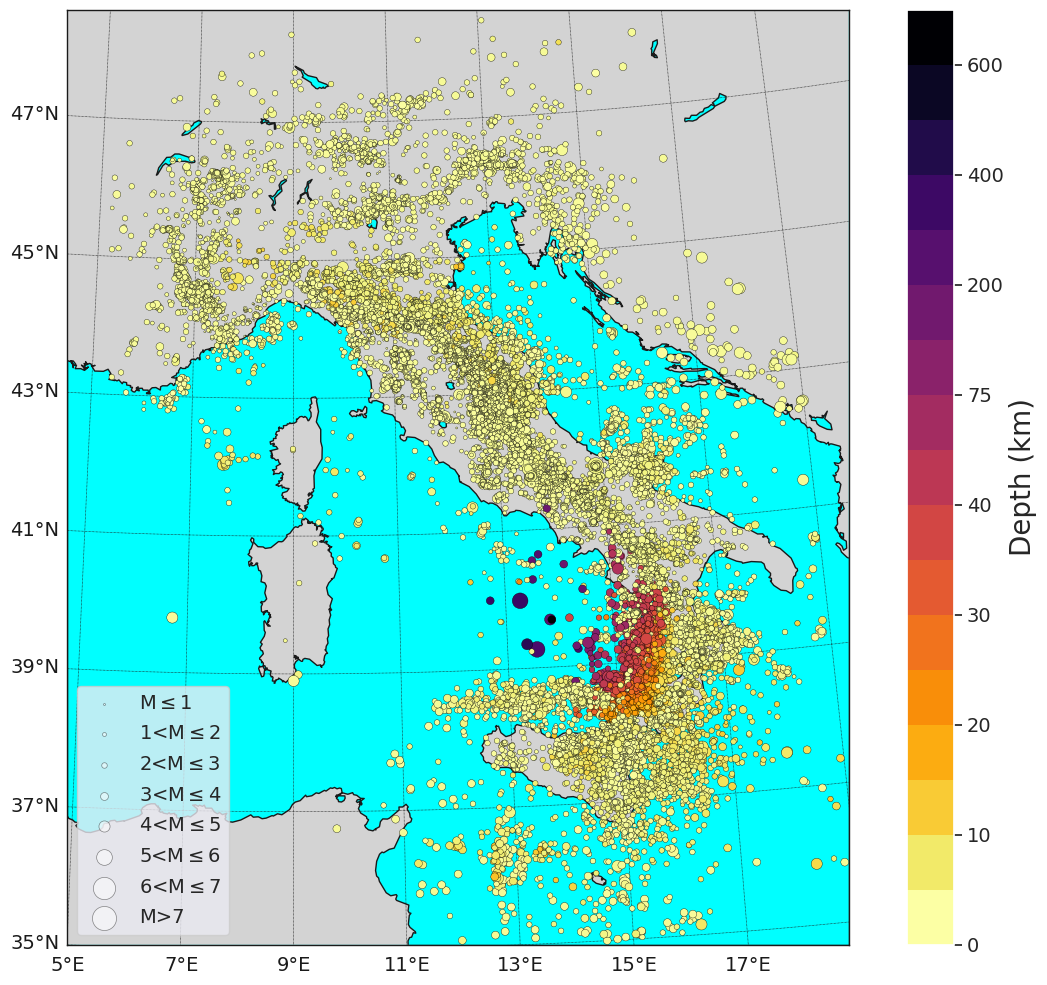

In [24]:
fig = plt.figure(figsize=(12,10))

#Custom adjust of the subplots

plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)

ax = plt.subplot(111)
italonmin=5.00
italonmax=21.
italatmin=35.00
italatmax=48.00



#Let's create a basemap of the world
ita=[italonmin,italatmin,italonmax,italatmax]

m = Basemap(llcrnrlon=ita[0],llcrnrlat=ita[1],urcrnrlon=ita[2],urcrnrlat=ita[3], epsg=3003,resolution='i')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray',lake_color='aqua')
m.drawcoastlines()

m.drawparallels(np.arange(italatmin,italatmax,2.),linewidth=0.5,labels=[1,0,0,0],fontsize=14)
m.drawmeridians(np.arange(italonmin,italonmax,2.),linewidth=0.5,labels=[0,0,0,1],fontsize=14)

rsnlat = df_eq['source_latitude_deg'].tolist()
rsnlon = df_eq['source_longitude_deg'].tolist()

cc = df_eq['source_depth_km'].tolist()
sx,sy = m(rsnlon,rsnlat)
m.scatter(sx, sy, mag_size, c=cc, cmap=cmap,marker="o",edgecolor='black', linewidths=0.25, zorder=2)


# for i in range(len(rsncode)):
#     plt.text(sx[i], sy[i]+up, rsncode[i], ha="center", va="bottom", family="monospace", 
#              weight="bold",fontsize=fontsize, zorder=5,clip_on=True)

p1 = plt.scatter([], [], 2, c = 'w',  marker= "o",edgecolors='k', linewidths=0.5,alpha=0.5)
p2 = plt.scatter([], [], 8, c = 'w',  marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)
p3 = plt.scatter([], [], 16, c = 'w', marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)
p4 = plt.scatter([], [], 32, c = 'w', marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)
p5 = plt.scatter([], [], 64, c = 'w', marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)
p6 = plt.scatter([], [], 128, c = 'w', marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)
p7 = plt.scatter([], [], 256, c = 'w', marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)
p8 = plt.scatter([], [], 300, facecolor='w', marker="o",edgecolors='k', linewidths=0.5,alpha=0.5)

plt.legend([p1,p2,p3,p4,p5,p6,p7,p8],["M$\leq$1","1<M$\leq$2","2<M$\leq$3","3<M$\leq$4","4<M$\leq$5","5<M$\leq$6","6<M$\leq$7","M>7",],
           labelspacing=0.6, loc='lower left', fontsize=14)



fig = plt.gcf()
mapper.set_array(cc)
cbar=fig.colorbar(mapper)
cbar.set_label('Depth (km)',fontsize=20)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(14)

plt.tight_layout()
figname=os.path.join(FIGDIR, 'hypocenter_map.png')
plt.savefig(figname,dpi=300)
plt.show()

In [22]:
# generate station map
df_sta0 = df_metadata[['station_code','station_latitude_deg','station_longitude_deg']].groupby('station_code').mean()
# count using sta_lat as dummy index
df_sta1 = df_metadata[['station_code', 'station_latitude_deg']].groupby('station_code').count()
# rename
df_sta1.rename(columns={"station_latitude_deg": "counts"},inplace=True)

# generate the dataframe
df_sta = pd.concat([df_sta0,df_sta1], axis=1)

# Define symbol dimension as a funcion of number of picks recorded at each seismic station
mark_size = []
for m in df_sta.counts.values:
    if m <= 100: fact  = 10.
    if m > 100 and m <= 500: fact  = 20
    if m > 500 and m <= 1000: fact  = 40
    if m > 1000 and m <= 5000: fact  = 80
    if m > 5000: fact  = 160
    mark_size.append(int(fact))

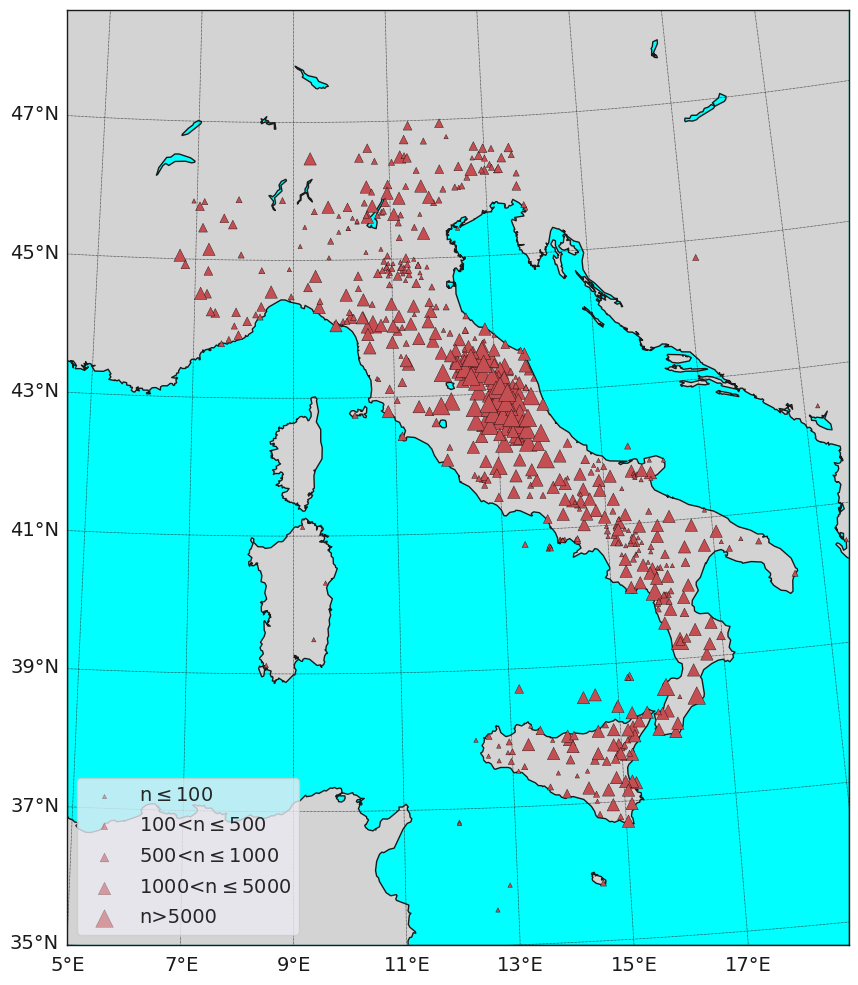

In [25]:
fig = plt.figure(figsize=(12,10))

#Custom adjust of the subplots

plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)

ax = plt.subplot(111)
italonmin=5.00
italonmax=21.
italatmin=35.00
italatmax=48.00


#Let's create a basemap of the world
ita=[italonmin,italatmin,italonmax,italatmax]

m = Basemap(llcrnrlon=ita[0],llcrnrlat=ita[1],urcrnrlon=ita[2],urcrnrlat=ita[3], epsg=3003,resolution='i')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray',lake_color='aqua')
m.drawcoastlines()


m.drawparallels(np.arange(italatmin,italatmax,2.),linewidth=0.5,labels=[1,0,0,0],fontsize=14)
m.drawmeridians(np.arange(italonmin,italonmax,2.),linewidth=0.5,labels=[0,0,0,1],fontsize=14)

rsnlat = df_sta['station_latitude_deg'].tolist()
rsnlon = df_sta['station_longitude_deg'].tolist()

sx,sy = m(rsnlon,rsnlat)
m.scatter(sx, sy, mark_size, color="r", marker="^",edgecolor='black',linewidths=0.25, zorder=2)


# for i in range(len(rsncode)):
#     plt.text(sx[i], sy[i]+up, rsncode[i], ha="center", va="bottom", family="monospace", 
#              weight="bold",fontsize=fontsize, zorder=5,clip_on=True)

p1 = plt.scatter([], [], 10, c = 'r',  marker= "^",edgecolors='k', linewidths=0.25,alpha=0.5)
p2 = plt.scatter([], [], 20, c = 'r',  marker="^",edgecolors='k', linewidths=0.25,alpha=0.5)
p3 = plt.scatter([], [], 40, c = 'r', marker="^",edgecolors='k', linewidths=0.25,alpha=0.5)
p4 = plt.scatter([], [], 80, c = 'r', marker="^",edgecolors='k', linewidths=0.25,alpha=0.5)
p5 = plt.scatter([], [], 160, c = 'r', marker="^",edgecolors='k', linewidths=0.25,alpha=0.5)

plt.legend([p1,p2,p3,p4,p5],["n$\leq$100","100<n$\leq$500","500<n$\leq$1000","1000<n$\leq$5000","n>5000",],
           labelspacing=0.6, loc='lower left', fontsize=14)

plt.tight_layout()
figname=os.path.join(FIGDIR, 'station_map.png')
plt.savefig(figname,dpi=300)
plt.show()